In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
algo = ['BP','GA','RHC','SA']
time_taken = np.zeros(4)
final_training = np.zeros(4)
final_test = np.zeros(4)

## Backpropagation - Baseline Model

In [22]:
BP_df = pd.read_csv('BACKPROP_LOG.csv')

In [23]:
BP_df.head(n=5)


,iteration,MSE_trg,MSE_tst,acc_trg,acc_tst,f1_trg,f1_tst,elapsed
0,0,0.093693,0.093298,0.763681,0.778776,0.158915,0.160991,0.034261
1,10,0.068064,0.066276,0.798802,0.807347,0.229406,0.233766,0.134784
2,20,0.066213,0.065146,0.814321,0.814694,0.418089,0.381471,0.165666
3,30,0.064982,0.064424,0.814321,0.805714,0.458730,0.398990,0.191694
4,40,0.064122,0.063805,0.819494,0.807347,0.476717,0.415842,0.222819


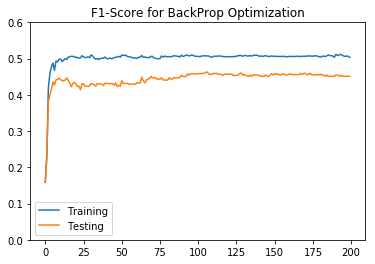

In [24]:
ymin = 0
ymax = 0.6
plt.figure()
plt.plot(BP_df['f1_trg'],label='Training')
plt.plot(BP_df['f1_tst'],label='Testing')
plt.title('F1-Score for {} Optimization'.format('BackProp'))
plt.ylim(ymin, ymax) 
plt.legend()


In [25]:
time_taken[0] = BP_df.iloc[-1].elapsed
final_training[0]= BP_df.iloc[-1].f1_trg
final_test[0]= BP_df.iloc[-1].f1_tst

## Genetic Algorithm

In [26]:
GA_df = pd.read_csv('GA_LOG.csv')
GA_df.tail(n=5)


,iteration,MSE_trg,MSE_tst,acc_trg,acc_tst,f1_trg,f1_tst,elapsed
4995,49950,0.080297,0.078012,0.766676,0.779592,0.445307,0.437500,766.397707
4996,49960,0.080371,0.078106,0.766131,0.778776,0.438929,0.431866,766.575784
4997,49970,0.080334,0.078079,0.765859,0.776327,0.438642,0.429167,766.747240
4998,49980,0.080677,0.078371,0.767220,0.776327,0.460568,0.443089,766.899616
4999,49990,0.080409,0.078195,0.768037,0.777143,0.446753,0.439425,767.064310


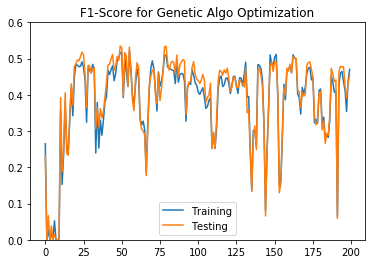

In [27]:
GA_f1_training = GA_df.groupby(GA_df.index//25)['f1_trg'].max()
GA_f1_testing = GA_df.groupby(GA_df.index//25)['f1_tst'].max()


ymin = 0
plt.figure()
plt.plot(GA_f1_training,label='Training')
plt.plot(GA_f1_testing,label='Testing')
plt.title('F1-Score for {} Optimization'.format('Genetic Algo'))
plt.ylim(ymin, ymax) 
plt.legend()


In [28]:
time_taken[1] = GA_df.iloc[-1].elapsed
final_training[1]= GA_df.iloc[-1].f1_trg
final_test[1]= GA_df.iloc[-1].f1_tst

## Randomized Hill Climbing

In [29]:
RHC_df = pd.read_csv('RHC_LOG.csv')
RHC_df.tail(n=5)


,iteration,MSE_trg,MSE_tst,acc_trg,acc_tst,f1_trg,f1_tst,elapsed
1995,19950,0.062280,0.064225,0.827934,0.810612,0.533923,0.467890,31.818114
1996,19960,0.062009,0.064217,0.834740,0.817959,0.520916,0.454768,31.836513
1997,19970,0.061944,0.064144,0.833106,0.813061,0.525909,0.448193,31.853319
1998,19980,0.061942,0.064137,0.833379,0.816327,0.523364,0.452555,31.873670
1999,19990,0.061942,0.064139,0.833379,0.816327,0.523364,0.452555,31.889849


In [30]:
print(RHC_df.shape)

(2000, 8)


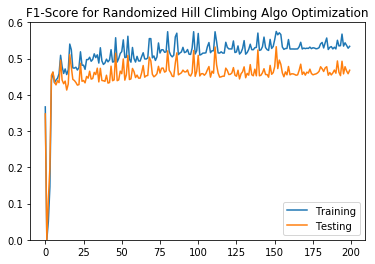

In [31]:
RHC_f1_training = RHC_df.groupby(RHC_df.index//10)['f1_trg'].max()
RHC_f1_testing = RHC_df.groupby(RHC_df.index//10)['f1_tst'].max()


ymin = 0
ymax = 0.6
plt.figure()
plt.plot(RHC_f1_training,label='Training')
plt.plot(RHC_f1_testing,label='Testing')
plt.title('F1-Score for {} Optimization'.format('Randomized Hill Climbing Algo'))
plt.ylim(ymin, ymax) 
plt.legend()


In [32]:
time_taken[2] = RHC_df.iloc[-1].elapsed
final_training[2]= RHC_df.iloc[-1].f1_trg
final_test[2]= RHC_df.iloc[-1].f1_tst

## Simulated Annealing

In [33]:
SA_df = pd.read_csv('SA_LOG.csv')
SA_df.tail(n=5)


,iteration,MSE_trg,MSE_tst,acc_trg,acc_tst,f1_trg,f1_tst,elapsed
9995,99950,0.060968,0.067251,0.828750,0.817143,0.518745,0.481481,197.814847
9996,99960,0.060954,0.067121,0.829023,0.817143,0.519878,0.481481,197.837271
9997,99970,0.060941,0.067146,0.829023,0.817143,0.519878,0.481481,197.853730
9998,99980,0.061440,0.067633,0.829295,0.818776,0.551181,0.511013,197.869629
9999,99990,0.060999,0.067220,0.831201,0.817959,0.533835,0.492027,197.891619


In [34]:
SA_df.shape

(10000, 8)

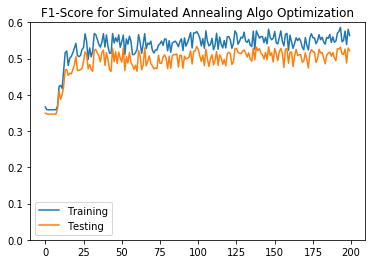

In [35]:
SA_f1_training = SA_df.groupby(SA_df.index//50)['f1_trg'].max()
SA_f1_testing = SA_df.groupby(SA_df.index//50)['f1_tst'].max()


ymin = 0
plt.figure()
plt.plot(SA_f1_training,label='Training')
plt.plot(SA_f1_testing,label='Testing')
plt.title('F1-Score for {} Optimization'.format('Simulated Annealing Algo'))
plt.ylim(ymin, ymax) 
plt.legend()

In [36]:
time_taken[3] = SA_df.iloc[-1].elapsed
final_training[3]= SA_df.iloc[-1].f1_trg
final_test[3]= SA_df.iloc[-1].f1_tst

## Summary Table

In [37]:
summary_table = pd.DataFrame(
    {'algo': algo,
     'time taken': time_taken,
     'final training score': final_training,
     'final testing score': final_test
    })

In [38]:
summary_table

,algo,final testing score,final training score,time taken
0,BP,0.451163,0.503412,5.112627
1,GA,0.439425,0.446753,767.064310
2,RHC,0.452555,0.523364,31.889849
3,SA,0.492027,0.533835,197.891619


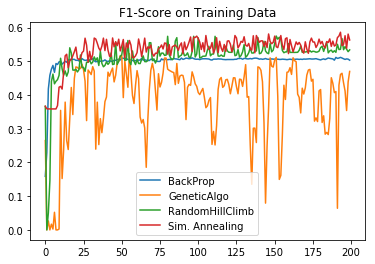

In [18]:
ymin = 0
ymax = 0.6
plt.figure()
plt.plot(BP_df['f1_trg'],label='BackProp')
plt.plot(GA_f1_training,label='GeneticAlgo')
plt.plot(RHC_f1_training,label='RandomHillClimb')
plt.plot(SA_f1_training,label='Sim. Annealing')
plt.legend()
plt.title('F1-Score on Training Data')
plt.show()

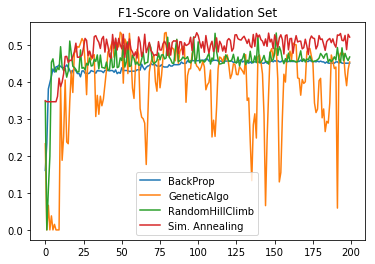

In [19]:
plt.figure()
plt.plot(BP_df['f1_tst'],label='BackProp')
plt.plot(GA_f1_testing,label='GeneticAlgo')
plt.plot(RHC_f1_testing,label='RandomHillClimb')
plt.plot(SA_f1_testing,label='Sim. Annealing')
plt.legend()
plt.title('F1-Score on Validation Set')
plt.show()

